<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2_n20.csv',
 'data_multi_delta_-2_n30.csv',
 'data_multi_delta_-2_n60.csv',
 'data_multi_delta_-2_n120.csv',
 'data_multi_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,91.145916,95.435123,22.324054,-0.001518,218.903574,218.903520,0.000055
1,0.0,1.0,49.702676,58.791629,96.992505,0.001194,215.488004,215.490713,-0.002709
2,0.0,2.0,59.618715,24.313133,48.217774,-0.000682,142.148941,142.141384,0.007556
3,0.0,3.0,34.236554,53.735092,51.971321,-0.002279,149.940687,149.943440,-0.002752
4,0.0,4.0,43.357100,46.285234,21.277339,0.003117,120.922788,120.914748,0.008040
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,82.436263,84.547659,58.233433,0.003475,235.220829,235.229186,-0.008357
29996,999.0,26.0,74.258170,36.604036,71.017144,-0.010507,191.868843,191.866137,0.002706
29997,999.0,27.0,26.046115,96.589930,23.828491,-0.003355,156.461181,156.467250,-0.006070
29998,999.0,28.0,71.946065,83.155905,29.978774,0.002257,195.083001,195.087434,-0.004433


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,91.145916,95.435123,22.324054,-0.001518,218.903574,218.903520,0.000055
1,0.0,1.0,49.702676,58.791629,96.992505,0.001194,215.488004,215.490713,-0.002709
2,0.0,2.0,59.618715,24.313133,48.217774,-0.000682,142.148941,142.141384,0.007556
3,0.0,3.0,34.236554,53.735092,51.971321,-0.002279,149.940687,149.943440,-0.002752
4,0.0,4.0,43.357100,46.285234,21.277339,0.003117,120.922788,120.914748,0.008040
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,82.436263,84.547659,58.233433,0.003475,235.220829,235.229186,-0.008357
29996,999.0,26.0,74.258170,36.604036,71.017144,-0.010507,191.868843,191.866137,0.002706
29997,999.0,27.0,26.046115,96.589930,23.828491,-0.003355,156.461181,156.467250,-0.006070
29998,999.0,28.0,71.946065,83.155905,29.978774,0.002257,195.083001,195.087434,-0.004433


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    91.145916  95.435123  22.324054 -0.001518  218.903574   
      1.0    49.702676  58.791629  96.992505  0.001194  215.488004   
      2.0    59.618715  24.313133  48.217774 -0.000682  142.148941   
      3.0    34.236554  53.735092  51.971321 -0.002279  149.940687   
      4.0    43.357100  46.285234  21.277339  0.003117  120.922788   
...                ...        ...        ...       ...         ...   
999.0 25.0   82.436263  84.547659  58.233433  0.003475  235.220829   
      26.0   74.258170  36.604036  71.017144 -0.010507  191.868843   
      27.0   26.046115  96.589930  23.828491 -0.003355  156.461181   
      28.0   71.946065  83.155905  29.978774  0.002257  195.083001   
      29.0   45.223417  76.124154  72.741153 -0.017971  204.070753   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    218.903520  0.000055  
      1.0    215.490713 -0.002709  
      2.0    142.141384  0.007556  
      3.0    149.943440 -0.002752  
      4.0    120.914748  0.008040  
...                 ...       ...  
999.0 25.0   235.229186 -0.008357  
      26.0   191.866137  0.002706  
      27.0   156.467250 -0.006070  
      28.0   195.087434 -0.004433  
      29.0   204.089041 -0.018288  

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    91.145916  95.435123  22.324054 -0.001518  218.903574   
      1.0    49.702676  58.791629  96.992505  0.001194  215.488004   
      2.0    59.618715  24.313133  48.217774 -0.000682  142.148941   
      3.0    34.236554  53.735092  51.971321 -0.002279  149.940687   
      4.0    43.357100  46.285234  21.277339  0.003117  120.922788   
...                ...        ...        ...       ...         ...   
999.0 25.0   82.436263  84.547659  58.233433  0.003475  235.220829   
      26.0   74.258170  36.604036  71.017144 -0.010507  191.868843   
      27.0   26.046115  96.589930  23.828491 -0.003355  156.461181   
      28.0   71.946065  83.155905  29.978774  0.002257  195.083001   
      29.0   45.223417  76.124154  72.741153 -0.017971  204.070753   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    218.903520  0.000055  
      1.0    215.490713 -0.002709  
      2.0    142.141384  0.007556  
      3.0    149.943440 -0.002752  
      4.0    120.914748  0.008040  
...                 ...       ...  
999.0 25.0   235.229186 -0.008357  
      26.0   191.866137  0.002706  
      27.0   156.467250 -0.006070  
      28.0   195.087434 -0.004433  
      29.0   204.089041 -0.018288  

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,91.145916,95.435123,22.324054,-0.001518,218.903574,218.903520,0.000055
1,0.0,1.0,49.702676,58.791629,96.992505,0.001194,215.488004,215.490713,-0.002709
2,0.0,2.0,59.618715,24.313133,48.217774,-0.000682,142.148941,142.141384,0.007556
3,0.0,3.0,34.236554,53.735092,51.971321,-0.002279,149.940687,149.943440,-0.002752
4,0.0,4.0,43.357100,46.285234,21.277339,0.003117,120.922788,120.914748,0.008040
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,82.436263,84.547659,58.233433,0.003475,235.220829,235.229186,-0.008357
29996,999.0,26.0,74.258170,36.604036,71.017144,-0.010507,191.868843,191.866137,0.002706
29997,999.0,27.0,26.046115,96.589930,23.828491,-0.003355,156.461181,156.467250,-0.006070
29998,999.0,28.0,71.946065,83.155905,29.978774,0.002257,195.083001,195.087434,-0.004433


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    91.145916  95.435123  22.324054 -0.001518  218.903574   
      1.0    49.702676  58.791629  96.992505  0.001194  215.488004   
      2.0    59.618715  24.313133  48.217774 -0.000682  142.148941   
      3.0    34.236554  53.735092  51.971321 -0.002279  149.940687   
      4.0    43.357100  46.285234  21.277339  0.003117  120.922788   
...                ...        ...        ...       ...         ...   
999.0 25.0   82.436263  84.547659  58.233433  0.003475  235.220829   
      26.0   74.258170  36.604036  71.017144 -0.010507  191.868843   
      27.0   26.046115  96.589930  23.828491 -0.003355  156.461181   
      28.0   71.946065  83.155905  29.978774  0.002257  195.083001   
      29.0   45.223417  76.124154  72.741153 -0.017971  204.070753   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    218.903520  0.000055  
      1.0    215.490713 -0.002709  
      2.0    142.141384  0.007556  
      3.0    149.943440 -0.002752  
      4.0    120.914748  0.008040  
...                 ...       ...  
999.0 25.0   235.229186 -0.008357  
      26.0   191.866137  0.002706  
      27.0   156.467250 -0.006070  
      28.0   195.087434 -0.004433  
      29.0   204.089041 -0.018288  

[30000 rows x 7 columns]

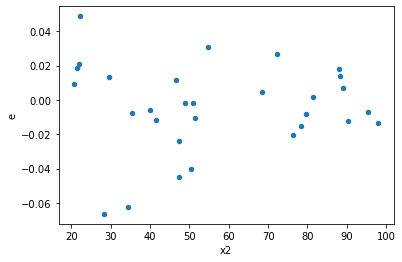

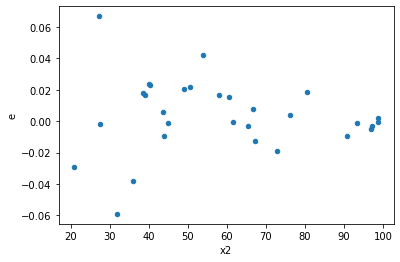

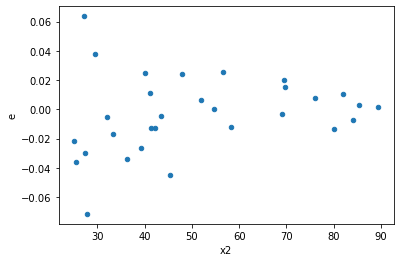

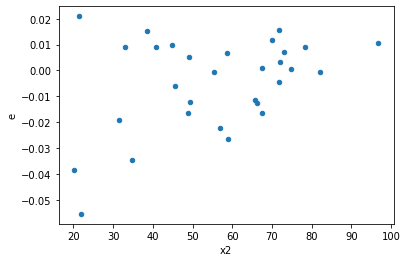

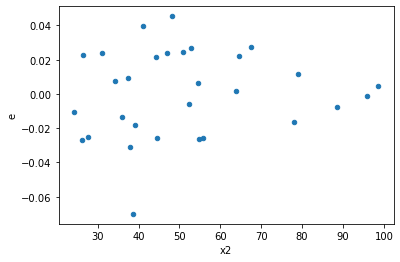

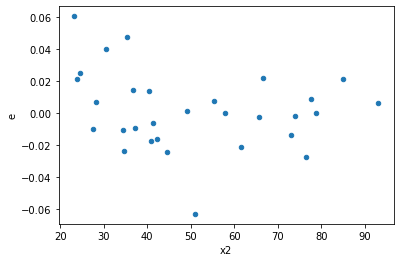

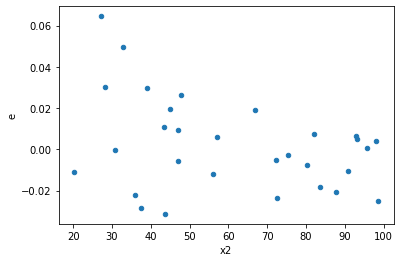

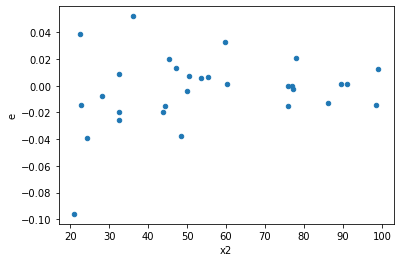

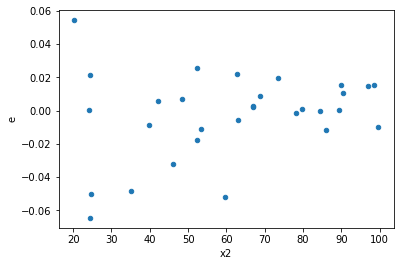

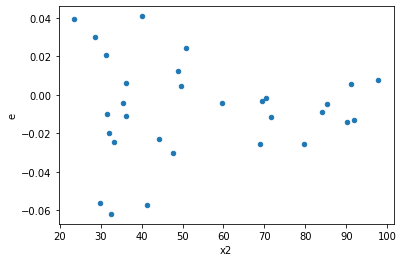

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,9.0,0.001961695824473953,0.00421907658081169,0.0002179662027193281,0.00046878628675685443,2.150729245673485,0.26938948797800766,0.8653052560109962,0.13469474398900383,Reject005=1 : Homoscedasticity
10.0,9.0,9.0,0.0036334768517081533,0.0038552470388377906,0.00040371965018979483,0.00042836078209308785,1.0610352552611915,0.9311231762824792,0.5344384118587604,0.4655615881412396,Reject005=1 : Homoscedasticity
12.0,9.0,9.0,0.003233517406576481,0.007843636670349615,0.0003592797118418312,0.0008715151855944017,2.4257289150189374,0.2029537851139216,0.8985231074430392,0.1014768925569608,Reject005=1 : Homoscedasticity
15.0,9.0,9.0,0.0020648557793823364,0.0035935543683329398,0.0002294284199313707,0.00039928381870366,1.7403415794045847,0.4217068429854338,0.7891465785072831,0.2108534214927169,Reject005=1 : Homoscedasticity
17.0,9.0,9.0,0.006536684734256531,0.00810134199067745,0.0007262983038062811,0.0009001491100752722,1.23936556833177,0.7544268626635049,0.6227865686682476,0.37721343133175245,Reject005=1 : Homoscedasticity
26.0,9.0,9.0,0.007950632385094676,0.01061601570163534,0.0008834035983438528,0.0011795573001817045,1.335241674805334,0.6736806923883694,0.6631596538058153,0.3368403461941847,Reject005=1 : Homoscedasticity
35.0,9.0,9.0,0.0021744763206730834,0.0026521255226874207,0.00024160848007478703,0.00029468061363193565,1.219661716926164,0.7722094547284315,0.6138952726357843,0.38610472736421575,Reject005=1 : Homoscedasticity
45.0,9.0,9.0,0.0029795894797899044,0.004743090183922901,0.0003310654977544338,0.0005270100204358779,1.5918602935386064,0.4994476413629694,0.7502761793185153,0.2497238206814847,Reject005=1 : Homoscedasticity
47.0,9.0,9.0,0.0041130490860215255,0.0046007678481439175,0.00045700545400239174,0.0005111964275715464,1.1185783957161943,0.8701635501646343,0.5649182249176828,0.43508177508231716,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.001961695824473953,0.00421907658081169,0.0002179662027193281,0.00046878628675685443,2.150729245673485,0.26938948797800766,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,0.0022168225200337103,0.0018440726637026772,0.00024631361333707894,0.0002048969626336308,0.8318539923866504,0.7883809161085731,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,0.009232463476557323,0.0038960706790609444,0.0010258292751730359,0.0004328967421178827,0.421996868869688,0.21477023448444155,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,0.003488343027994247,0.00035610637396027,0.0003875936697771386,3.9567374884474445e-05,0.10208467776892534,0.002254483491538482,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,0.002527720848694009,0.0014032165749355541,0.0002808578720771121,0.00015591295277061712,0.5551311473577276,0.39377724076189796,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,0.002139204921681779,0.000731936056454546,0.0002376894357424199,8.132622849494955e-05,0.34215331548467065,0.12588529177639962,Reject005=1 : Homoscedasticity
6.0,9.0,9.0,0.00735656589945944,0.0031263672907812265,0.0008173962110510489,0.0003473741434201363,0.4249764541647009,0.21842765147233603,Reject005=1 : Homoscedasticity
7.0,9.0,9.0,0.013085850519191896,0.002573733393330603,0.0014539833910213217,0.0002859703770367336,0.19668063528281393,0.023721841088887054,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,0.004999108335585062,0.002139444334099856,0.0005554564817316735,0.00023771603712220625,0.4279651870856026,0.22211737565840842,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      653
Reject005=0 : Heteroscedasticity    347
Name: Result_test, dtype: int64